In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("weight-height.csv")

In [30]:
data["Gender"] = data["Gender"].map({"Male":0, "Female":1})

In [50]:
data["Gender"].value_counts()

0    5000
1    5000
Name: Gender, dtype: int64

In [51]:
data["Gender"].unique()

array([0, 1], dtype=int64)

In [61]:
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


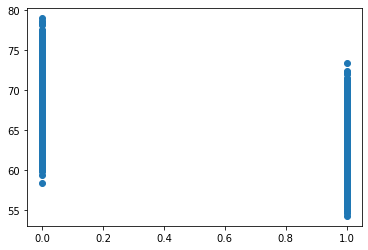

In [39]:
plt.scatter(data["Gender"], data["Height"])

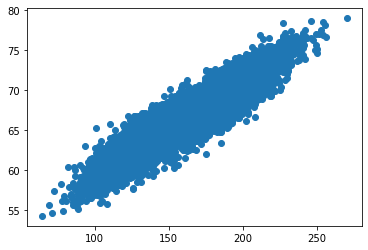

In [67]:
plt.scatter(data["Weight"], data["Height"])

In [42]:
corr = data.corr()

<AxesSubplot:>

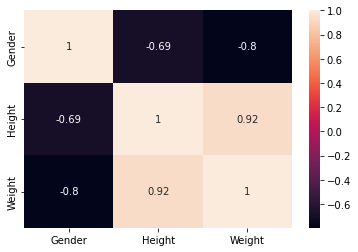

In [190]:
sns.heatmap(corr, annot=True)

In [44]:
# There is no correlation between Male/Female to Weight and Height so dont use Gender for linear regression.
# There is good correlation beween Height and Weights.

In [68]:
data.head(5)

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [105]:
# iloc[row_position, column_position]
X = pd.DataFrame(data.loc[:, "Height"])
y = data.loc[:, "Weight"]

In [107]:
X.shape

(10000, 1)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3)

In [110]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(7000, 1) (3000, 1) (7000,) (3000,)


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
regression = LinearRegression()

In [113]:
regression.fit(train_X, train_y)

LinearRegression()

In [118]:
predicted_y = regression.predict(test_X)

In [126]:
predicted_y

array([167.54814417, 162.92400122, 200.49829387, ..., 163.86139178,
       173.99619497, 122.08120069])

In [131]:
test_y

4828    182.680352
5192    156.832191
2179    209.677785
7272    135.425418
5938    121.787567
           ...    
4974    174.198289
5823    137.533670
2301    179.297684
2667    194.754189
5941    102.918034
Name: Weight, Length: 3000, dtype: float64

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
mean_squared_error(predicted_y, test_y)

149.57841718828908

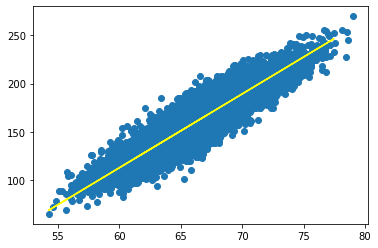

In [144]:
plt.scatter(data["Height"], data["Weight"])
plt.plot(test_X, predicted_y, 'yellow')

(0.0, 25.0)

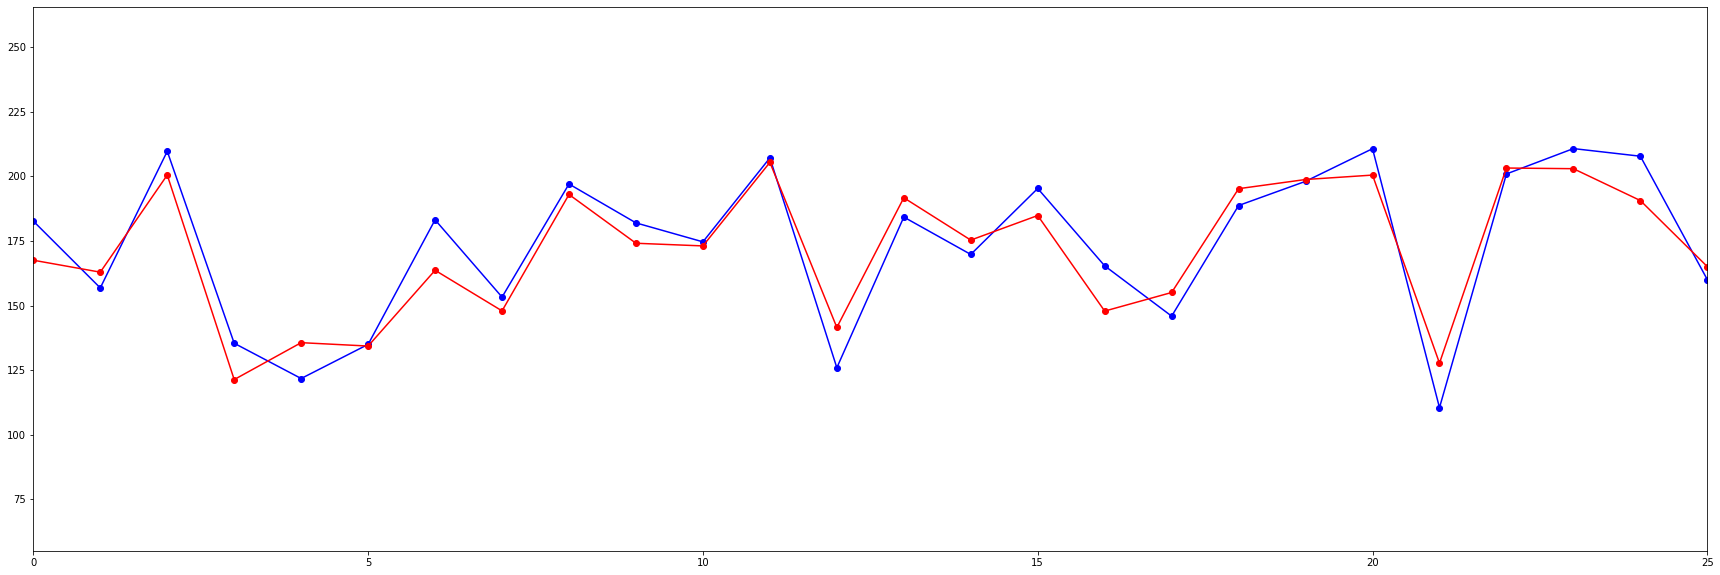

In [186]:
plt.figure(figsize=(30, 10))
plt.plot(np.arange(test_y.count()), list(test_y), 'blue', marker='o')
plt.plot(np.arange(len(predicted_y)), list(predicted_y), 'red', marker='o')
plt.xlim((0, 25))

In [164]:
print(type(predicted_y), type(test_y))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [187]:
from sklearn.metrics import r2_score,mean_squared_error

In [188]:
r2_score(test_y, predicted_y)

0.8548966771290551

In [189]:
mean_squared_error(test_y, predicted_y)

149.57841718828908